In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt # data visualization
import ipywidgets as widgets # interactive widgets
from ipywidgets import Box

In [2]:
df = pd.read_csv('SpotifyFeatures.csv')
#df

In [3]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [4]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [5]:
# RUN ONLY ONCE 
# Data Cleaning and Modification

# Remove duplicates and unnecessary variables
df.drop_duplicates(subset=['track_id'],keep='first',inplace=True) #will keep the first duplicate and drop rest
df.drop(['genre','artist_name','track_name','track_id','key'],axis=1, inplace=True) #if True, the source DataFrame is changed and None is returned

# Data cleaning and arrangement
df['mode'] = np.where(df['mode']=='Major', 1, 0)

# Change songs duration from milliseconds to seconds
df['duration_ms'] = df['duration_ms'] / 1000
df.rename(columns={'duration_ms': 'duration_s'}, inplace=True)

In [6]:
# Convert time_signature to an integer
df['time_signature_ind'] = 1
count = 0
for i in df['time_signature'].unique():
    count += 1
    print(i,count)
    df.loc[df['time_signature']==i,'time_signature_ind'] = count

4/4 1
5/4 2
3/4 3
1/4 4
0/4 5


In [7]:
df.dtypes

popularity              int64
acousticness          float64
danceability          float64
duration_s            float64
energy                float64
instrumentalness      float64
liveness              float64
loudness              float64
mode                    int32
speechiness           float64
tempo                 float64
time_signature         object
valence               float64
time_signature_ind      int64
dtype: object

In [8]:
# Drop old time_signature
df.drop(['time_signature'],axis=1, inplace=True)

In [9]:
# Data Modeling

X = df.loc[:,df.columns !="popularity"] # all the features except popularity
y = df["popularity"] # popularity score

# separate the data to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# save as np.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train) 
y_test = np.array(y_test)
# The y vector contains the songs’ “popularity” score

# Create a linear regression, random forest & decision tree object
model_regression = linear_model.LinearRegression()
model_random_forest = RandomForestRegressor()
model_decision_tree = DecisionTreeRegressor()

# Train the model
model_regression.fit(X_train,y_train)
model_random_forest.fit(X_train,y_train)
model_decision_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [10]:
# Estimate the R² score on training and testing data

# (1) Linear regression
model_regression.score(X_train,y_train)
model_regression.score(X_test,y_test)

# (2) Random Forest
model_random_forest.score(X_train,y_train)
model_random_forest.score(X_test,y_test)

# (3) Decision Tree
model_decision_tree.score(X_train,y_train)
model_decision_tree.score(X_test,y_test)

-0.3329386872646254

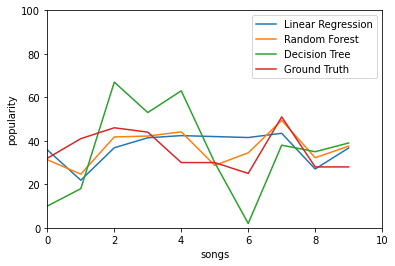

In [11]:
# Visualization
test_samples = 10 # amount of songs which would be evaluated

# initialized empty lists for the models predictions
regression = [] 
random_forest = [] 
decision_tree = []
ground_truth = []

# collecting the models' predictions 
for i in range(test_samples): 
    regression.append(model_regression.predict([X_test[i]])) 
    random_forest.append(model_random_forest.predict([X_test[i]]))
    decision_tree.append(model_decision_tree.predict([X_test[i]]))
    ground_truth.append(y_test[i])
    
# Plotting the models' predictions in comparison to the ground truth
plt.plot(range(len(regression)), regression, label='Linear Regression')
plt.plot(range(len(random_forest)), random_forest, label='Random Forest')
plt.plot(range(len(decision_tree)), decision_tree, label='Decision Tree')
plt.plot(range(len(ground_truth)), ground_truth, label='Ground Truth')
plt.xlim([0, test_samples])
plt.ylim([0, 100])
plt.xlabel('songs')
plt.ylabel('popularity')
plt.legend()
plt.show()

In [12]:
# Linear Regression
MSE_lr = ((y_test - model_regression.predict(X_test)) ** 2).mean()
RMSE_lr = np.sqrt(MSE_lr)
print("Linear regression MSE: ", MSE_lr)
print("Linear regression RMSE:", RMSE_lr)

# Random Forest
MSE_rm = ((y_test - model_random_forest.predict(X_test)) ** 2).mean()
RMSE_rm = np.sqrt(MSE_rm)
print("Random Forest MSE: ", MSE_rm)
print("Random Forest RMSE:", RMSE_rm)

# Decision Tree
MSE_dt = ((y_test - model_decision_tree.predict(X_test)) ** 2).mean()
RMSE_dt = np.sqrt(MSE_dt)
print("Decision Tree MSE: ", MSE_dt)
print("Decision Tree RMSE:", RMSE_dt)

Linear regression MSE:  242.3154227532458
Linear regression RMSE: 15.566483956026994
Random Forest MSE:  198.9390554485171
Random Forest RMSE: 14.104575691899317
Decision Tree MSE:  406.21529093794686
Decision Tree RMSE: 20.154783326494652


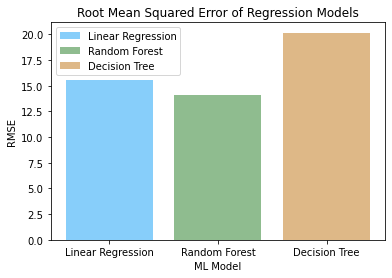

In [13]:
# Compute the RMSE of the models
MSEs = [MSE_lr, MSE_rm, MSE_dt]
RMSEs = [RMSE_lr, RMSE_rm, RMSE_dt]

# Set the colors for each bar
colors = ["lightskyblue", "darkseagreen", "burlywood"]

# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(["Linear Regression", "Random Forest", "Decision Tree"], RMSEs, color=colors)

# Add a legend
ax.legend(bars, ["Linear Regression", "Random Forest", "Decision Tree"])

# Set the axis labels and title
ax.set_xlabel("ML Model")
ax.set_ylabel("RMSE")
ax.set_title("Root Mean Squared Error of Regression Models")

# Display the bar chart
plt.show()


In [14]:
# Variables ranges
acousticness = [0,1]
danceability = [0,1]
duration_s = [0,600]
energy = [0,1]
instrumentalness = [0,1]
liveness = [0,1]
loudness= [ -60,0]
speechiness = [0,1]
tempo = [0,250]
valence = [0,1]
mode = [0,1]

features_range = {"acousticness":[0,1],"danceability" : [0,1],"duration_s":[0,600],"energy":[0,1],
                  "instrumentalness":[0,1],"liveness":[0,1],"loudness": [-60,0], "time_signature_ind": [0,4],
                  "speechiness" : [0,1],"tempo" : [0,250],"valence" : [0,1],"mode" : [0,1]}

In [15]:
regression = []
random_forest = []
decision_tree = []
features = X.shape[1]
widgets_box = []
headers = X.columns
temp_sample =X.iloc[0]
for feature in range(features):
   temp_widget = widgets.FloatSlider(value=temp_sample[feature],
   min=features_range[headers[feature]][0],
   max=features_range[headers[feature]][1],
   step=0.1,
   description=headers[feature],
   disabled=False,
   continuous_update=False,
   orientation='vertical',
   readout=True,
   readout_format='.1f',
   )
   widgets_box.append(temp_widget)
# display the features panel
box = Box(children=widgets_box)
display(box)

Box(children=(FloatSlider(value=0.611, continuous_update=False, description='acousticness', max=1.0, orientati…

C:\Users\denis\AppData\Local\Temp\ipykernel_1540\164060588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_sample[feature] = widgets_box[feature].value
C:\Users\denis\AppData\Local\Temp\ipykernel_1540\164060588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_sample[feature] = widgets_box[feature].value
C:\Users\denis\AppData\Local\Temp\ipykernel_1540\164060588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_s

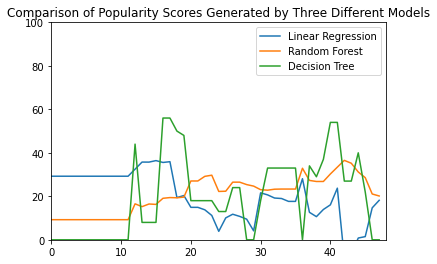

In [19]:
# Predict the popularity score based on the selected features
for feature in range(features):
   temp_sample[feature] = widgets_box[feature].value
   regression.append(model_regression.predict([temp_sample]))
   random_forest.append(model_random_forest.predict([temp_sample]))
   decision_tree.append(model_decision_tree.predict([temp_sample]))
# plot a simple line chart
plt.plot(range(len(regression)), regression, label='Linear Regression')
plt.plot(range(len(random_forest)), random_forest, label='Random Forest')
plt.plot(range(len(decision_tree)), decision_tree, label='Decision Tree')
plt.xlim([0, len(regression)])
plt.ylim([0, 100])
plt.title("Comparison of Popularity Scores Generated by Three Different Models")
plt.legend()
plt.show()